<a href="https://colab.research.google.com/github/CarrieIsPop/Gender-Clasification/blob/main/GenderClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserhessein/gender-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gender-dataset' dataset.
Path to dataset files: /kaggle/input/gender-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2:

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

3:

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

4:

In [ ]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=8

5:

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory('/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Train',
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    seed=1337,
                                                    target_size=(64, 64))

validation_generator = test_datagen.flow_from_directory('/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Validation',
                                                          batch_size=64,
                                                          class_mode='binary',
                                                          seed=1337,
                                                          target_size=(64, 64))

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Train'

6:

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=input_shape,include_top=False,weights="imagenet")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


7:

In [ ]:

for layer in base_model.layers[:fre]:
    layer.trainable=False

8:

In [ ]:
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 128)      │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 384)      │       442,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 500)      │     1,728,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 500)      │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 1, 500)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     1,026,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 30,591,621 (116.70 MB)

 Trainable params: 30,587,805 (116.68 MB)

 Non-trainable params: 3,816 (14.91 KB)

9:

In [ ]:
model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

10:

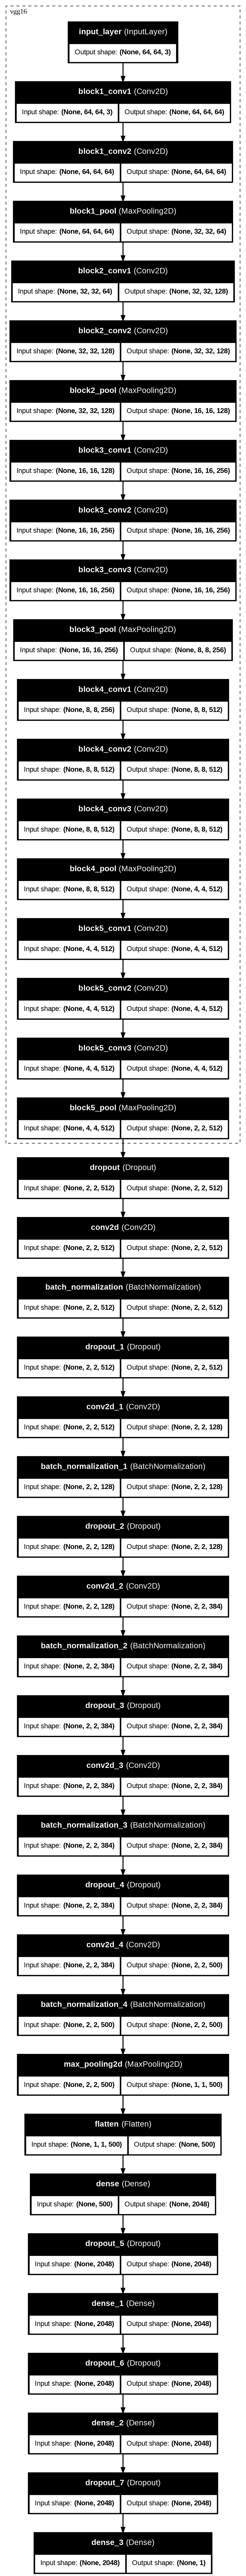

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

11:

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = patience,
                        verbose = verbose ,
                        factor = factor,
                        min_lr = min_lr)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=verbose, patience=patience)

12:

In [ ]:
%%time
hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[lrd, mcp, es],
    verbose=1
)

NameError: name 'model' is not defined

13:

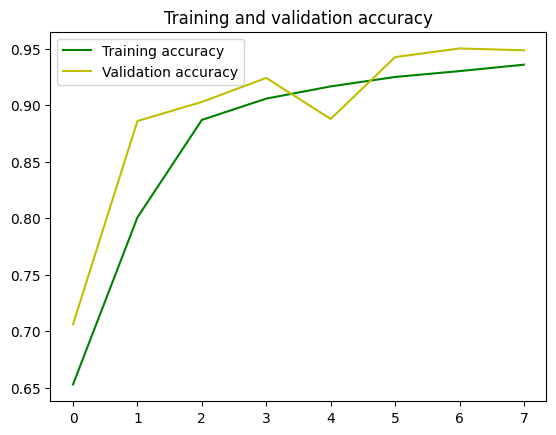

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Guardar modelo

In [ ]:
modelsave = 'final_model.h5'
model.save(modelsave)

In [ ]:
pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.8.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.35.1 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import tensorflowjs as tfjs

# Cargar tu modelo entrenado
from tensorflow.keras.models import load_model
model = load_model('final_model.h5')

# Guardarlo en formato TFJS
tfjs.converters.save_keras_model(model, "model_web")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'final_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

14: Test

In [ ]:
import numpy as np

from keras.preprocessing import image
#  images test 1


160002.jpg /root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Test/Male/170179.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
Prediction value: [0.]
This is a female


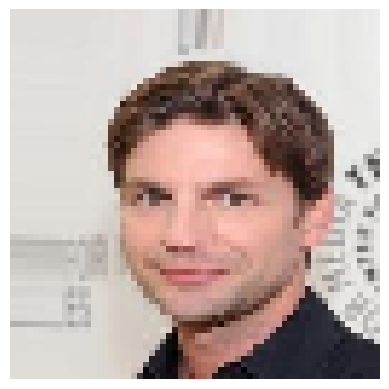

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os

# Ruta de la carpeta de test
path_testmodel = '/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Test/Male'

# Elige una imagen dentro de esa carpeta
test_img = os.path.join(path_testmodel, os.listdir(path_testmodel)[0])  # la primera imagen
print('160002.jpg', test_img)

# Cargar y procesar
imge = image.load_img(test_img, target_size=target_size)
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

# Normalizar igual que en entrenamiento
X = X / 255.0

# Predicción
classes = model.predict(X, batch_size=1)
print("Prediction value:", classes[0])

if classes[0] > 0.5:
    print("This is a male")
else:
    print("This is a female")

plt.imshow(imge)
plt.axis("off")
plt.show()

In [ ]:
print(train_generator.class_indices)

{'Female': 0, 'Male': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicción: Male (0.0000)


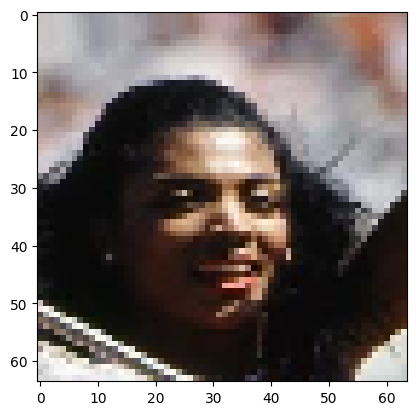

In [ ]:
import numpy as np

path_testmodel = '/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Test/Female/160003.jpg'
imge = image.load_img(path_testmodel, target_size=target_size)

X = image.img_to_array(imge) / 255.0  # normalización
X = np.expand_dims(X, axis=0)

pred = model.predict(X, batch_size=1)[0][0]

# Mapear usando class_indices
class_labels = {v: k for k, v in train_generator.class_indices.items()}

predicted_class = 1 if pred <= 0.5 else 0
print(f"Predicción: {class_labels[predicted_class]} ({pred:.4f})")

plt.imshow(imge)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model.h5")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/model.h5 /content/drive/MyDrive/model_web

2025-08-21 14:40:42.701527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755787242.741687   29392 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755787242.754331   29392 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755787242.795339   29392 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755787242.795399   29392 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755787242.795404   29392 computation_placer.cc:177] computation placer alr

In [ ]:
from google.colab import files
files.download("model.h5")

FileNotFoundError: Cannot find file: model.h5